# Prediction of Heart Disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In this project we will import the following 5 Machine Learning algorithms.
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Logistic Regression

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR

### Importing the dataset

In [4]:
dataset = pd.read_csv('dataset.csv')

In [5]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data visualization for understanding the dataset

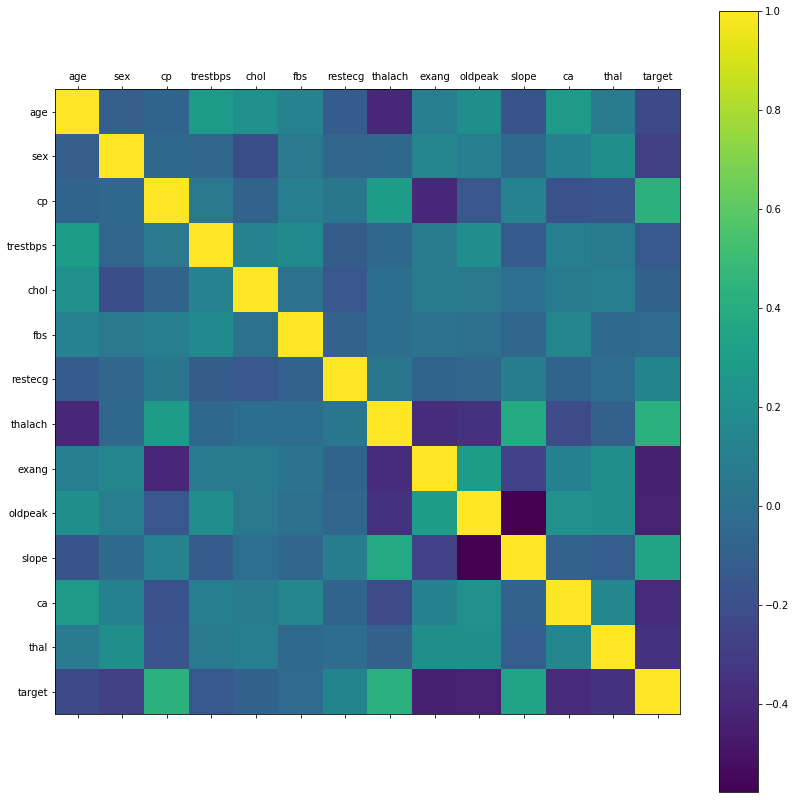

In [7]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.
Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x094556D0>,
      dtype=object)

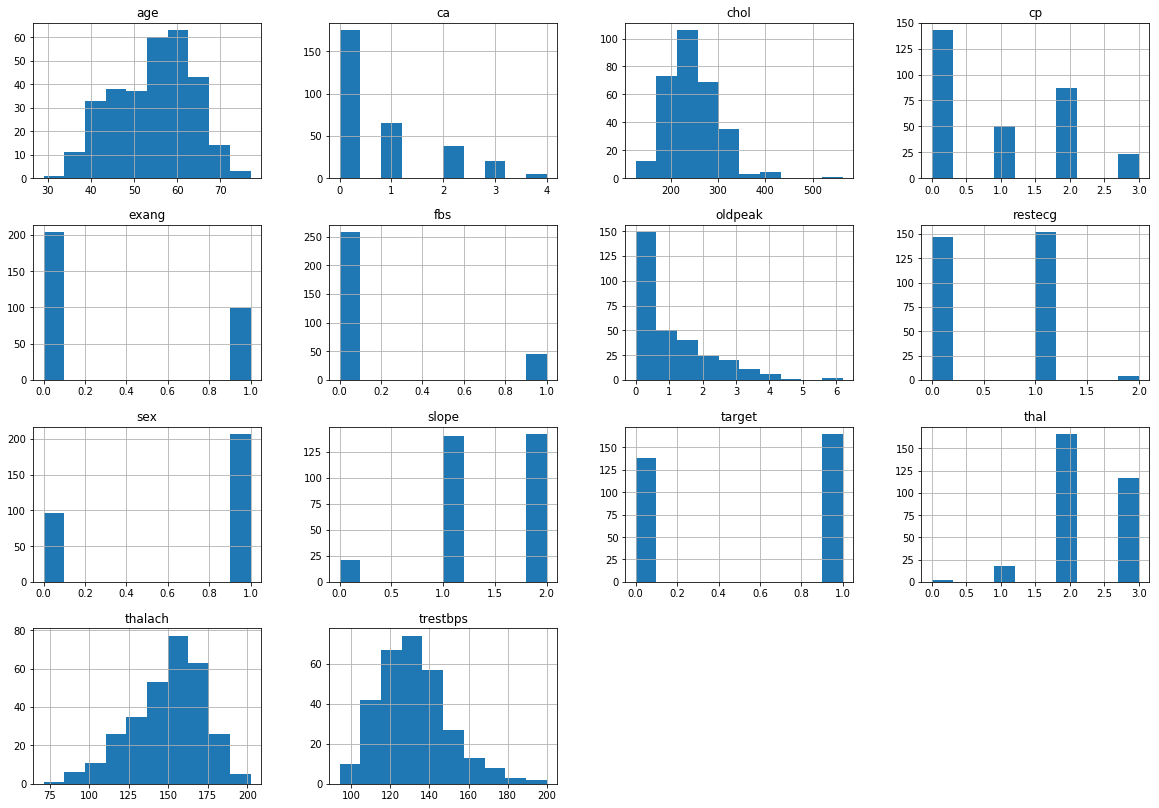

In [8]:
dataset.hist()

Text(0.5, 1.0, 'Count of Target Classes')

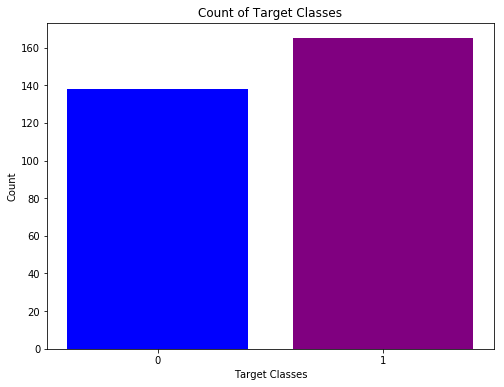

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['purple', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of Target Classes')

### Data Processing

we need to convert some categorical variables into dummy variables

In [10]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

`StandardScaler` from `sklearn` to scale the dataset.

In [11]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### Machine Learning

We'll now import `train_test_split` to split our dataset into training and testing datasets.

In [12]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

#### K Neighbors Classifier

In [13]:
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

I have the scores for different neighbor values in the array `knn_scores`. I'll now plot it and see for which value of K did I get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

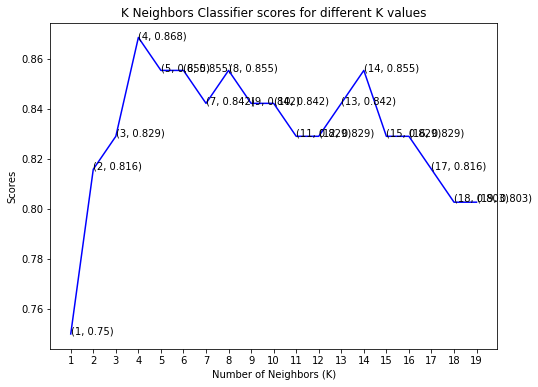

In [14]:
plt.plot([k for k in range(1, 20)], knn_scores, color = 'blue')
for i in range(1,20):
    plt.text(i, round(knn_scores[i-1],3), (i, round(knn_scores[i-1],3)))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, we can see that maximum score achieved is `0.868` for the 4 neighbors.

In [15]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[3]*100, 4))

The score for K Neighbors Classifier is 86.8421052631579% with 4 nieghbors.


#### Support Vector Classifier

In [16]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

We'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

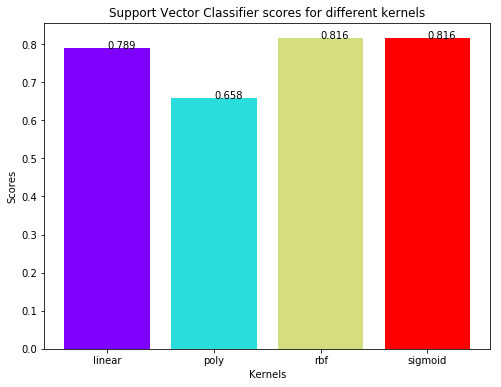

In [17]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, round(svc_scores[i],3), round(svc_scores[i],3))
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `rbf` kernel and `sigmoid` kernel performed the best.

In [18]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[2]*100, 'rbs and sigmoid'))

The score for Support Vector Classifier is 81.57894736842105% with rbs and sigmoid kernel.


#### Decision Tree Classifier

In [19]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

We selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

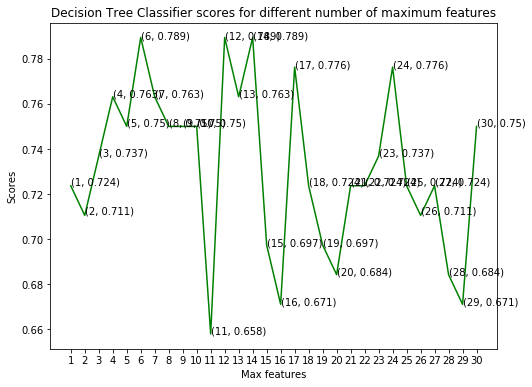

In [20]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, round(dt_scores[i-1],3), (i, round(dt_scores[i-1],3)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at maximum features, `6` and 12

In [21]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 72.36842105263158% with [2, 4, 18] maximum features.


### Logistic Regression

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [23]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [24]:
lrmodel_score = []    
for i in range(len(solver)):
    lrmodel=LR(C=0.01,solver=solver[i])
    lrmodel.fit(X_train,y_train)
    lrmodel_score.append(lrmodel.score(X_test, y_test))

Text(0.5, 1.0, 'Logistic Regression scores for different solver')

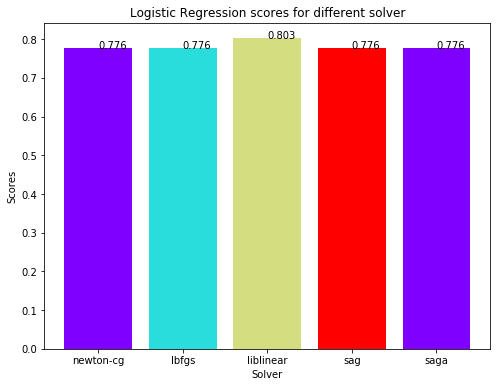

In [25]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(solver, lrmodel_score, color = colors)
for i in range(len(solver)):
    plt.text(i, round(lrmodel_score[i],3), round(lrmodel_score[i],3))
plt.xlabel('Solver')
plt.ylabel('Scores')
plt.title('Logistic Regression scores for different solver')

#### Random Forest Classifier

In [26]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

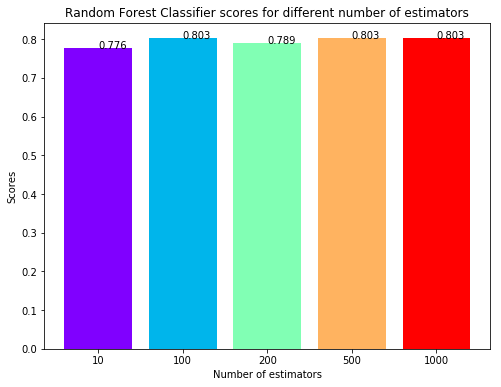

In [27]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, round(rf_scores[i],3), round(rf_scores[i],3))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500 and 1000.

In [28]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500, 1000]))

The score for Random Forest Classifier is 80.26315789473685% with [100, 500, 1000] estimators.
